<a href="https://colab.research.google.com/github/shahab-f/EAI6010-Applications_of_Artificial_Intelligence-Winter_2023/blob/Python-Image-Processing-and-CNN-for-Digit-Classification/EAI6010_ShahabaddinFeghahati_Week4_Winter_2023_rev_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAI6010 - Module 4: Vision AI Applications

Instructor: Dr. Vladimir Shapiro

Student: Shahabaddin Feghahati

Assignment Data: An image from NC STATE University Libraries and the widely used MNIST dataset for handwritten digit recognition.

Term: Winter 2023

# Introduction
The following code showcases a range of image processing techniques using popular Python libraries, including OpenCV, NumPy, Pandas, and Matplotlib. The script begins by reading images from URLs and displaying them using OpenCV, providing an explanation of the difference between RGB and BGR formats. The script goes on to cover several techniques for generating histograms of color and grayscale images to enhance image contrast, including the display of histograms of individual color channels. It also demonstrates the process of finding contours in an image, a key technique in image processing that is used for object detection, image recognition, and segmentation. To further illustrate its capabilities, the code applies various mathematical operations to the grayscale image, such as thresholding and histogram equalization. It then shows how to perform a Fourier Transform on the grayscale image and how to use high-pass filtering to extract edges. Throughout the code, the output images are clearly displayed alongside their respective figure numbers and titles in APA format. Relevant notes are included where necessary to provide additional context and insight.

On the second pard, the code implements a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. The code loads the dataset and displays a sample of handwritten digits, transforms the data into a suitable format for training and testing, and defines the structure of the CNN model. The model is then built and trained using the training set, and the accuracy of the model is evaluated using the test set. It also explores the impact of changes in the number of epochs on the results obtained, as well as the effect of experimenting with alternative model parameters and architecture. The study visualizes and interprets the results obtained through these experiments to gain insight into their impact.This code demonstrates the use of deep learning and CNNs for image classification tasks, achieving high accuracy levels that often exceed human performance.


# Body

#### Part I - Digital image processing is a foundation for many of the computer vision algorithms that exist today, including enabling AI Vision applications. The assignment aims at introducing many of the basic concepts to the students.

#### Q1. Load the supplied EAI6010_Image_Processing_Week4.ipynb script to Google Colab (through, e.g., your Google Drive or your GitHub)

#### Q2. Clear all outputs and execute (Run all) to make sure it runs correctly, producing all outputs.

#### A1 & A2:


#### Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

#### Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.


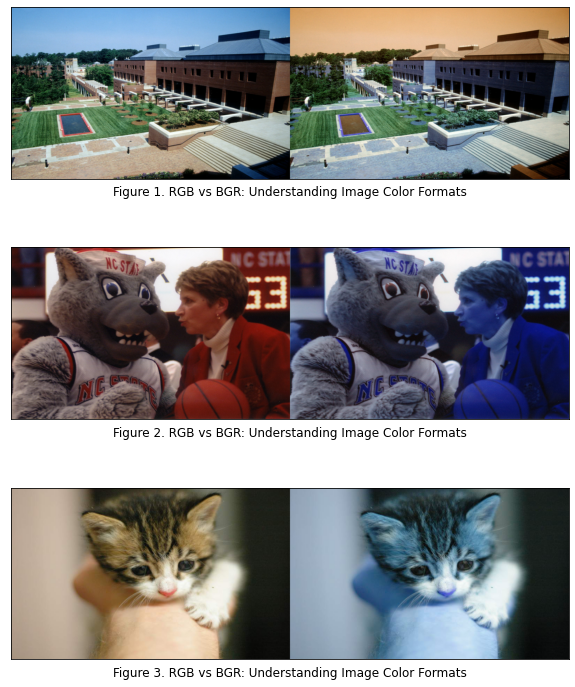

In [ ]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://placekitten.com/800/571"]

# Create a grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4)

# Loop over the subplots
for i, ax in enumerate(axs):
    # Read the image from the url
    image = io.imread(urls[i])
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    final_frame = cv.hconcat((image, image_2))
    
    # Display the image and set axis labels
    ax.imshow(final_frame, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"Figure {i+1}. RGB vs BGR: Understanding Image Color Formats", fontsize=12)

plt.show()


#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

#### Q3. Uncomment the code in the cell beginning with ## TODO: LOAD IMAGE, and load your portrait or another desired picture. Run the rest of the script with it instead of the default image in the supplied script.

#### Q4. Comment on the results

#### A3 & A4:

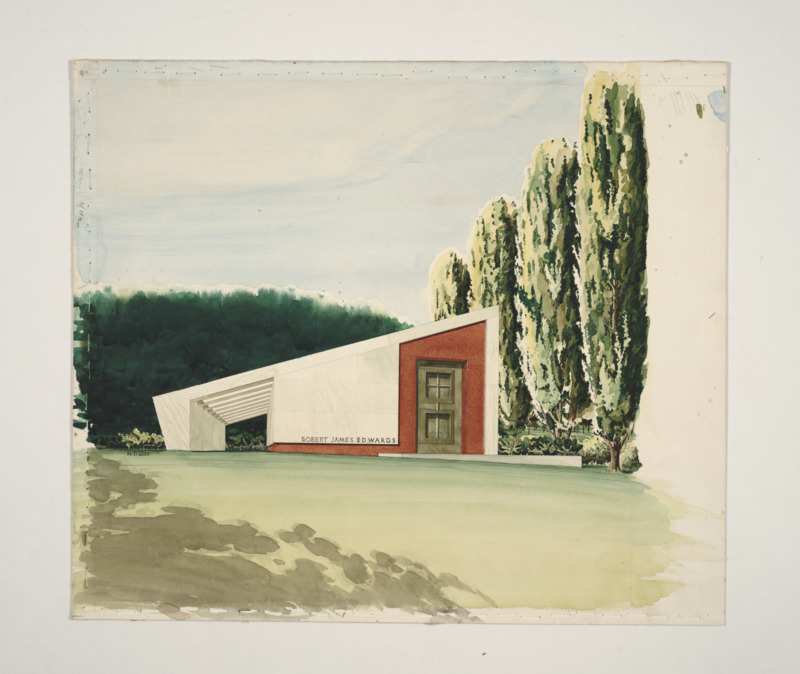


Figure 4. Perspective from the South - Front
Source: https://d.lib.ncsu.edu/collections/catalog/mc00198-008-ff0051-000-001_0005


In [ ]:
url = 'https://iiif.lib.ncsu.edu/iiif/mc00198-008-ff0051-000-001_0005/full/800,/0/default.jpg'
myImg = io.imread(url)
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))

# Add a blank line after the image
print()

# Add the figure number and title in APA format
print("Figure 4. Perspective from the South - Front")

# Add any relevant notes in APA format
print("Source: https://d.lib.ncsu.edu/collections/catalog/mc00198-008-ff0051-000-001_0005")

The image shows a perspective view of a building with a triangular roof and several windows. The building appears to be made of brick and stone, and has some decorative elements on its facade.
The image quality is good, with clear details and colors. The image size is 800 pixels wide, which is suitable for displaying on a web page or document. In addition, the figure number and title are formatted according to APA style guidelines.

#### Step3: Image Contours and Histograms

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(myImg.dtype)
# Check the height of image 
print(myImg.shape[0])
# Check the width of image 
print(myImg.shape[1])
# Check the number of channels of the image
print(myImg.shape[2])

uint8
674
800
3


The data type of the image matrix is uint8, which means unsigned 8-bit integer. This implies that each pixel value can range from 0 to 255, and that the image has a bit depth of 8 bits per channel (8-Bit and 16-Bit Images, n.d.). The height of the image is 674 pixels, which means that there are 674 rows in the image matrix. The width of the image is 800 pixels, which means that there are 800 columns in the image matrix. The number of channels of the image is 3, which means that the image has three color components: red, green, and blue (RGB).

### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

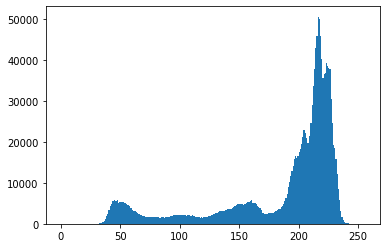


Figure 5. A histogram of pixel values in the photograph of perspective from the south - front
Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.


In [ ]:
plt.hist(myImg.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Add a blank line after the histogram
print()

# Add the figure number and title in APA format
print("Figure 5. A histogram of pixel values in the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.")

The histogram suggests that the image has a high contrast between bright and dark areas, with a cluster of bright pixels (peak on almost 225) and smaller clusters of darker pixels (tiny peaks on almost 45 and 160). This information can be useful for adjusting image processing techniques, identifying areas of interest, and interpreting the image's content.

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

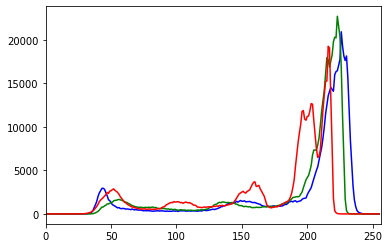


Figure 6. A plot of color histograms for the photograph of perspective from the south - front
Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.
The blue, green and red lines represent the histograms for the blue, green and red channels respectively.


In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([myImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
print("Figure 6. A plot of color histograms for the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.\nThe blue, green and red lines represent the histograms for the blue, green and red channels respectively.")

The histograms of the blue, green, and red channels are skewed to the left with peaks around 190 to 225. This means that there is a higher concentration of pixels in the image with lower intensity values for each color channel. In other words, the image is likely to be relatively dark, with more darker pixels present in the image than brighter ones.

The peaks in the histogram indicate the most common intensity values for each color channel. In this case, the fact that the peaks are towards the higher end of the intensity range (around 190 to 225) indicates that the image is not completely dark and still has some bright areas.

Overall, this information can give an indication of the overall brightness and contrast of the image, which can be helpful in determining the appropriate adjustments needed to enhance the image.

#### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM

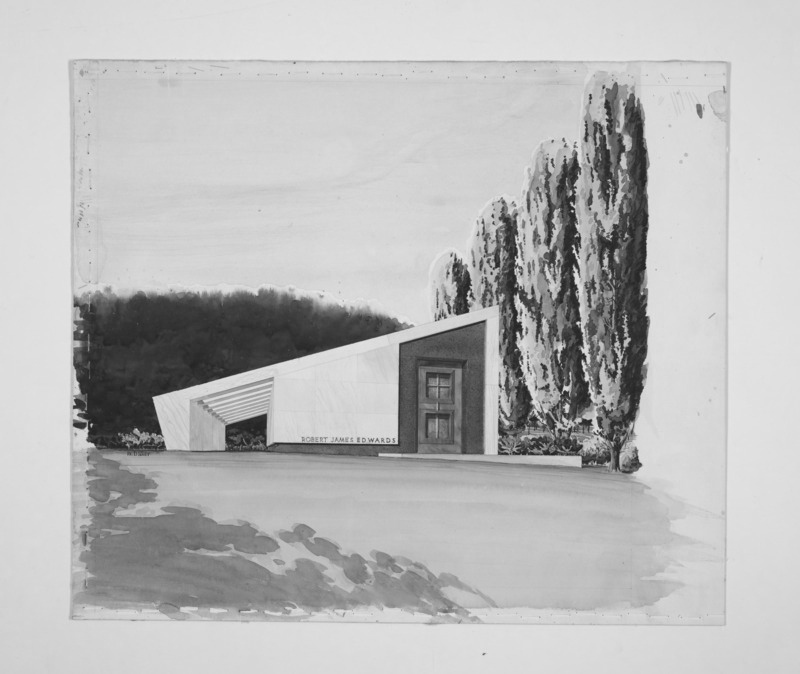


Figure 7. A grayscale version of the photograph of perspective from the south - front
Note: The pixel values range from 0 (black) to 255 (white).


In [ ]:
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

# Add a blank line after the image
print()

# Add the figure number and title in APA format
print("Figure 7. A grayscale version of the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The pixel values range from 0 (black) to 255 (white).")

The code converts a color image ('myImg') to grayscale using OpenCV's 'cvtColor' function and displays the result using 'cv2_imshow'. Converting a color image to grayscale can be useful in image processing tasks, such as feature detection and pattern recognition, as it reduces the complexity of the image by representing it using a single intensity value per pixel instead of three (one for each color channel) (Rosebrock, 2021).

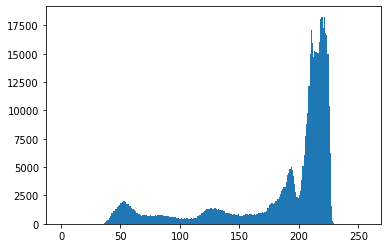


Figure 8. A histogram of pixel values in the grayscale version of the photograph of perspective from the south - front
Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.


In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

# Add a blank line after the histogram
print()

# Add the figure number and title in APA format
print("Figure 8. A histogram of pixel values in the grayscale version of the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.")

The code is plotting a histogram of a grayscale image using the plt.hist function from the matplotlib library. The gray_image.ravel() function is used to convert the 2D image array into a 1D array to be used as input for the histogram.

The histogram is displayed using plt.show(). The bins parameter sets the number of bins used to divide the range of pixel intensities (0-255) into equal intervals, while the range parameter specifies the minimum and maximum values of the bins.

In general, histograms are useful tools for visualizing the distribution of pixel intensities in an image and can provide insights into the image's overall brightness, contrast, and texture.

#### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

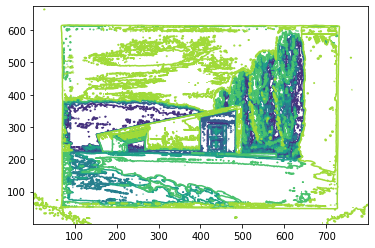


Figure 9. A contour plot of pixel values in the grayscale version of the photograph of perspective from the south - front
Note: The contours show the regions where the pixel values are equal or close to each other.


In [ ]:
plt.contour(gray_image, origin = "image")
plt.show()

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
print("Figure 9. A contour plot of pixel values in the grayscale version of the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The contours show the regions where the pixel values are equal or close to each other.")

The contour plot shows regions of the image that have similar pixel values. The contours represent boundaries between regions of the image where the pixel values change abruptly. The contour lines themselves do not represent the actual pixel values, but rather the boundaries between regions with different pixel values.

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

#### TODO # 3: Find the contour of your own image

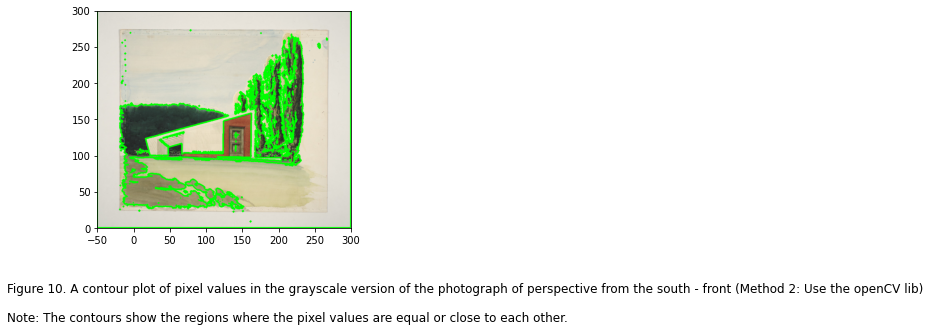

In [ ]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(myImg, contours, -1, (0, 255, 0), 3)

# Plot the image with extent argument
plt.imshow(myImg , extent=(0 , 300 , 0 , 300))

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
fig_title = "Figure 10. A contour plot of pixel values in the grayscale version of the photograph of perspective from the south - front (Method 2: Use the openCV lib)"
plt.figtext(0.01 , -0.1 , fig_title , wrap=True , horizontalalignment='left', fontsize=12)

# Add any relevant notes in APA format
fig_note = "Note: The contours show the regions where the pixel values are equal or close to each other."
plt.figtext(0.01 , -0.2 , fig_note , wrap=True , horizontalalignment='left', fontsize=12)

# Show the plot with captions
plt.show()

The code uses OpenCV to detect contours in a grayscale image and Matplotlib to plot the image with detected contours overlaid in green. This helps visualize object boundaries or features and can aid in image segmentation or object recognition.


#### Step4: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

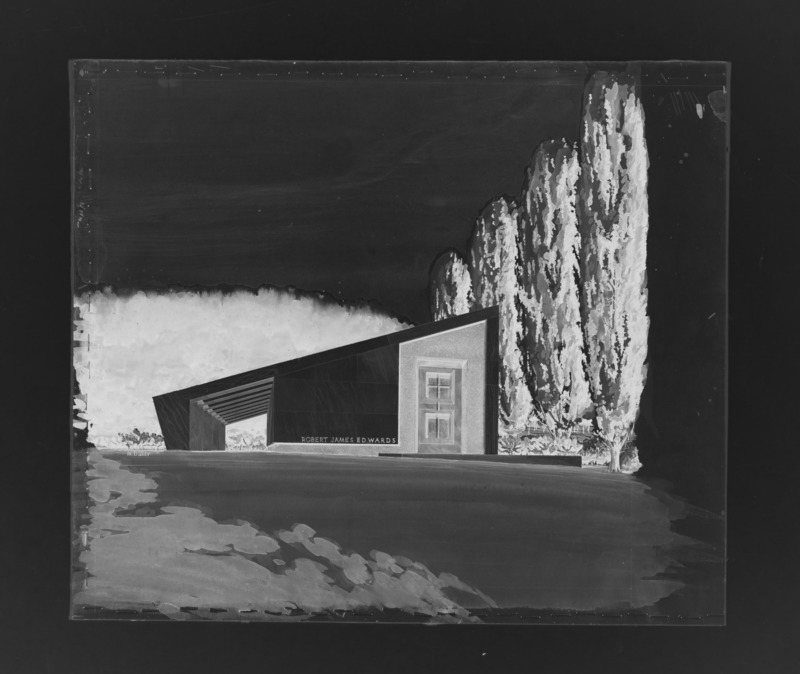


Figure 11. Inverse grayscale image - the photograph of perspective from the south - front
Note: The bright pixels in the original grayscale image become dark, and the dark pixels
become bright after applying the inverse operation.


In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
print("Figure 11. Inverse grayscale image - The photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The bright pixels in the original grayscale image become dark, and the dark pixels\nbecome bright after applying the inverse operation.")

The code inverts a grayscale image by subtracting each pixel value from 255, and displays the result using the cv2_imshow function from OpenCV. This can enhance contrast and reveal details that are difficult to see in the original image.

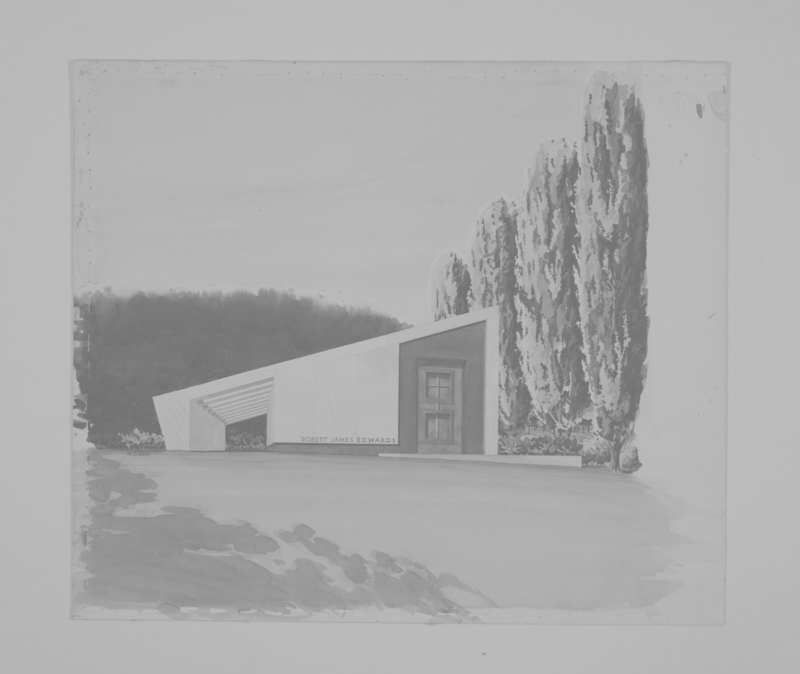


Figure 12. Brightened Pixels with Hazy Image Effect - The photograph of perspective from the south - front


In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
print("Figure 12. Brightened Pixels with Hazy Image Effect - The photograph of perspective from the south - front")

The code brightens a grayscale image by adding a constant to all pixel values and displays the result using the cv2_imshow function from OpenCV. This generates a hazing-like effect but may result in loss of detail and saturation.

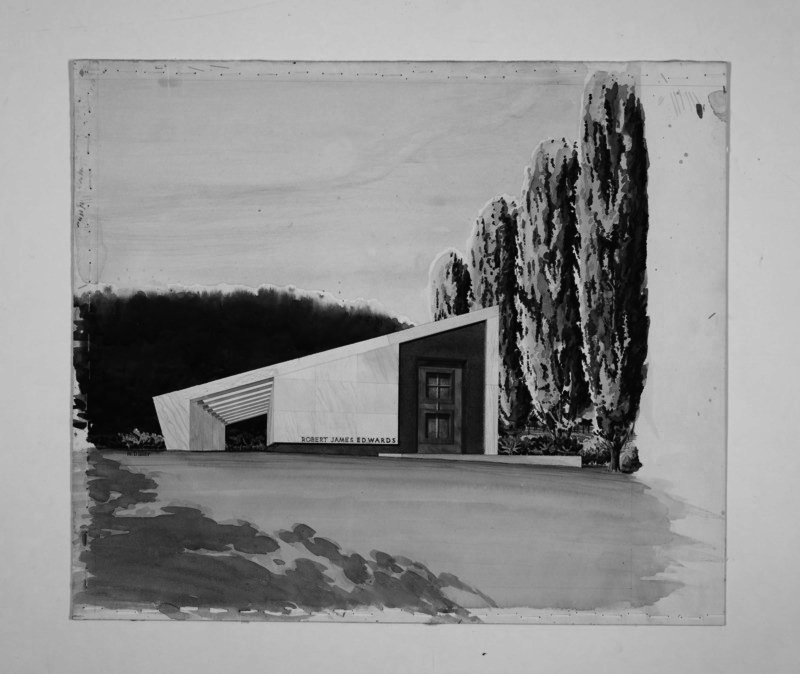


Figure 13. Image Darkened - The photograph of perspective from the south - front


In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
print("Figure 13. Image Darkened - The photograph of perspective from the south - front")

The code darkens a grayscale image by raising each pixel value to the power of 2 and displays the result using the cv2_imshow function from OpenCV. This can be useful for reducing the impact of overexposed regions or increasing the contrast of darker regions. However, it can also result in loss of detail and should be used carefully.

#### TODO #4:  Try some mathematical operations on your image


#### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

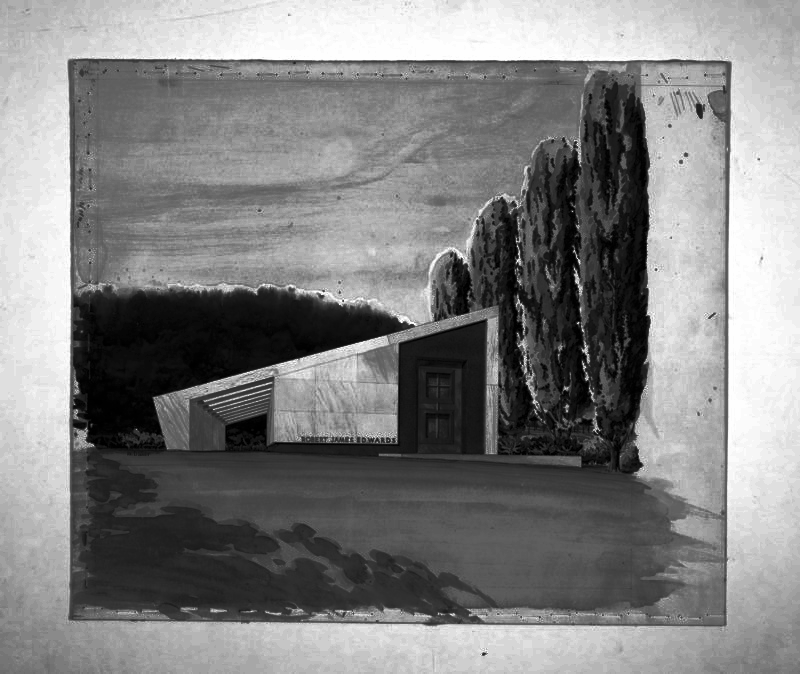


Figure 13. Histogram equalization applied to the dark image - The photograph of perspective from the south - front
Note: The contrast of the black background has increased, as shown by the brighter appearance of the image.


In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

# Add a blank line after the plot
print()

# Add the figure number and title in APA format
print("Figure 13. Histogram equalization applied to the dark image - The photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The contrast of the black background has increased, as shown by the brighter appearance of the image.")


The code performs histogram equalization on a previously darkened grayscale image im4 using a function called histeq. The resulting image im5 has increased contrast, particularly in the black background.

#### TODO # 5: Do a histogram equalization on your grayscale image:

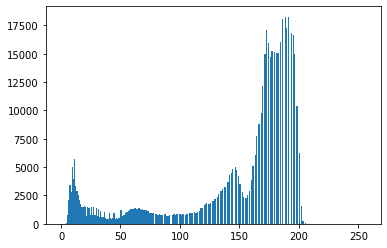


Figure 14. A histogram of image before histogram equalization of the photograph of perspective from the south - front
Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.


In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

# Add a blank line after the histogram
print()

# Add the figure number and title in APA format
print("Figure 14. A histogram of image before histogram equalization of the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.")

The output of this code will be a histogram plot that shows the distribution of pixel intensities in the input image im4 before histogram equalization. This plot can help to determine the distribution of pixel intensities and whether the image needs histogram equalization. If the histogram is skewed towards low or high intensities, the image may benefit from histogram equalization to improve contrast and visibility of details.

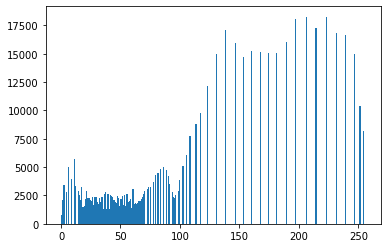


Figure 14. A histogram of image after histogram equalization of the photograph of perspective from the south - front
Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.


In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

# Add a blank line after the histogram
print()

# Add the figure number and title in APA format
print("Figure 14. A histogram of image after histogram equalization of the photograph of perspective from the south - front")

# Add any relevant notes in APA format
print("Note: The x-axis shows the pixel values from 0 to 255. The y-axis shows the frequency of each pixel value.")

The output of this code will be a histogram plot that shows the distribution of pixel intensities in the image after histogram equalization. This plot can help to evaluate the effectiveness of the histogram equalization technique in improving the contrast of the image. If the histogram after equalization appears to be more evenly distributed and less skewed towards low or high intensities, then it suggests that the technique has been successful in redistributing the pixel intensities to improve the image's contrast and visibility of details.


#### Step5: Fourier Transform of Gray Images
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

#### TODO # 6: Generate a fourier transform of your grayscale image

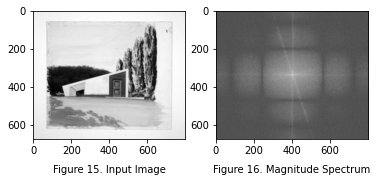

In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.text(0.5,-.2,'Figure 15. Input Image', ha='center', va='top', transform=plt.gca().transAxes)
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.text(0.5,-.2,'Figure 16. Magnitude Spectrum', ha='center', va='top', transform=plt.gca().transAxes)
plt.show()

The code blurs an image and converts it into a frequency spectrum, which shows the distribution of frequencies present in the image. The output is a 2D array of values representing the magnitude of each frequency component, which can be used to identify the dominant frequencies and determine the amount of smoothing or sharpening needed. The logarithmic scaling of values improves visibility of low magnitude components (Perspective From the South, n.d.; Understanding Fourier Transform in Images, n.d.).


#### Step6: Finding Edges by Highpass Filtering in FFT

This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

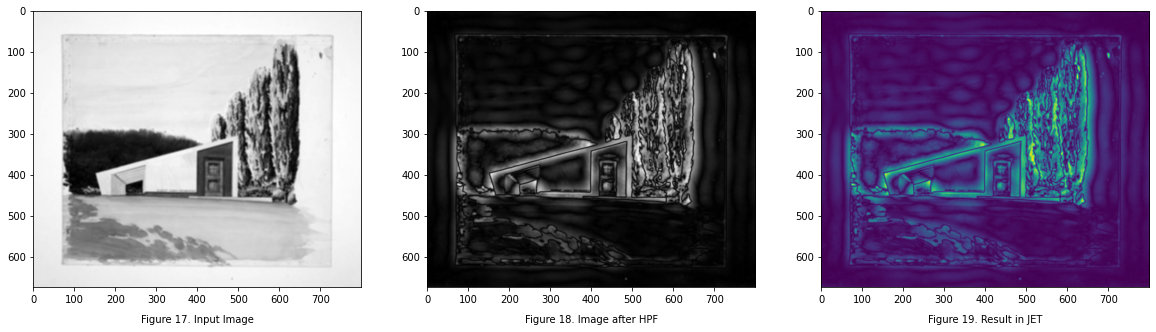

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
# Add text below x axis at position (0.5,-0.1) relative to axes
plt.text(0.5,-0.1,'Figure 17. Input Image', ha='center', va='top', transform=plt.gca().transAxes)
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
# Add text below x axis at position (0.5,-0.1) relative to axes
plt.text(0.5,-0.1,'Figure 18. Image after HPF', ha='center', va='top', transform=plt.gca().transAxes)
plt.subplot(133),plt.imshow(img_back)
# Add text below x axis at position (0.5,-0.1) relative to axes
plt.text(0.5,-0.1,'Figure 19. Result in JET', ha='center', va='top', transform=plt.gca().transAxes)
plt.show()

The code performs high-pass filtering on an image represented by an array using the Fourier transform. The image dimensions are obtained from the array, and the center pixel is calculated. Low frequencies are removed from the Fourier transformed image by removing a rectangular region around the center pixel. The inverse Fourier transform is then applied to obtain the filtered image. The original image and the filtered image are displayed using the plt.subplot function, and their identities are indicated using plt.text. The code demonstrates the use of Fourier transform for high-pass filtering an image.

#### Part II - Classification of handwritten digits is a typical use case for AI in vision. With the recent advancement of Deep Learning, unparalleled levels of accuracy, often exceeding human’s, have been achieved. This assignment involves an experiment with one such Deep Learning model implemented using the Keras framework.

#### Q1. Load the supplied EAI6010_DL_MNIST_classification_Week4.ipynb script to Google Colab (from, e.g., your Google Drive or your GitHub).

#### A1:

#### MNIST Classification Using *Convolutional Neural Network*
---
- Author: Vladimir Shapiro, adopted from Diego Inácio's
- Notebook: [MNIST_classification.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Experiments/MNIST_classification.ipynb)
---
Digit classification using *Convolutional Neural Network*.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf

#### Read the dataset
---

In [ ]:
mnist = tf.keras.datasets.mnist
[X_train, Y_train],[X_test, Y_test] = mnist.load_data()
X_train = X_train[..., None]
X_test = X_test[..., None]

# one hot for multi-class classification
# MNIST = 10 classes [0-9]
Y_train_oh = np.zeros((Y_train.size, 10))
Y_train_oh[np.arange(Y_train.size), Y_train] = 1
Y_test_oh = np.zeros((Y_test.size, 10))
Y_test_oh[np.arange(Y_test.size), Y_test] = 1

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28, 1)
Y_train: (60000,)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
Y_test: (10000,)
Y_test_oh: (10000, 10)


Display several randomly selected handwritten digits to provide a raw impression how the digits look like.

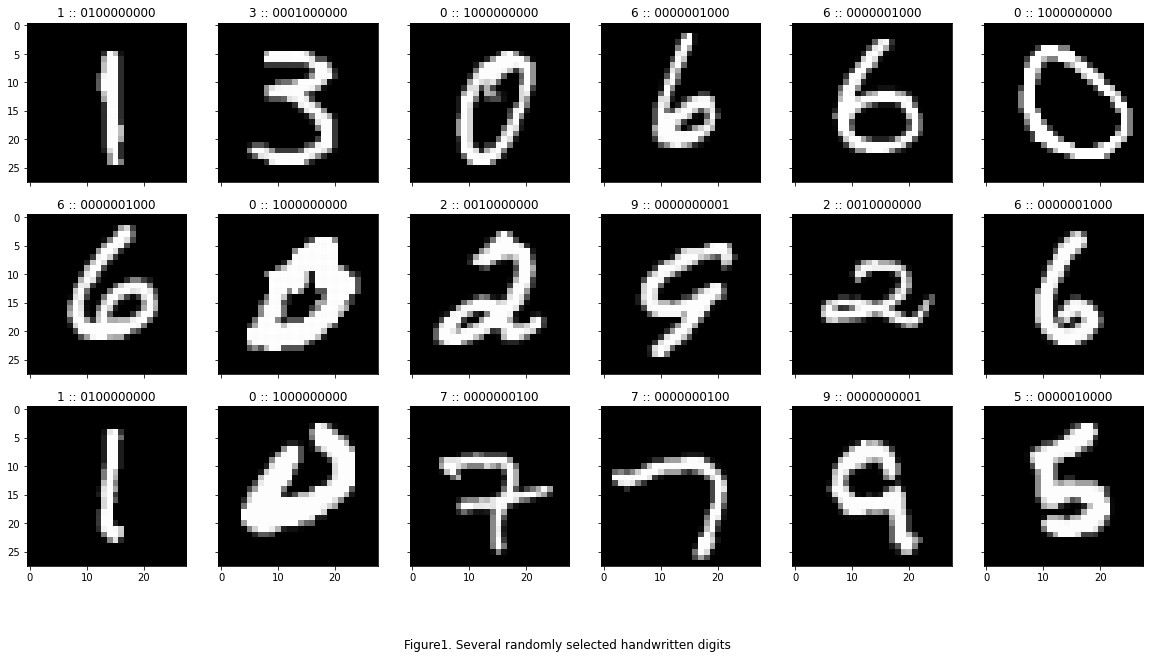

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)

np.random.seed(1234)
for ax in AX.ravel():
    rindex = np.random.randint(Y_train.size)
    img_show = X_train[rindex][...,0]
    ax.imshow(img_show, cmap='gray')
    # title label + one-hot
    title = f'{Y_train[rindex]} :: '
    title += ''.join([str(int(e)) for e in Y_train_oh[rindex]]) 
    ax.set_title(title)
plt.grid(False)

# Adding figure caption
caption = fig.text(0.5, 0.01, "Figure1. Several randomly selected handwritten digits", ha='center', fontsize=12)
caption.set_text("Figure1. Several randomly selected handwritten digits")

#### Transform dataset
---

To a format suitable for the training and predictions later on. A separate *X_test* dataset is allocated.

In [ ]:
# Change dtype to float32
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Change axes and normalization
X_train, Y_train = X_train/255, Y_train.reshape(-1, 1)
X_test, Y_test = X_test/255, Y_test.reshape(-1, 1)

# reshape Xs
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)

print('X_train:', X_train.shape)
print('x_train:', x_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('x_test:', x_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
x_train: (60000, 784)
Y_train: (60000, 1)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
x_test: (10000, 784)
Y_test: (10000, 1)
Y_test_oh: (10000, 10)


#### Classification using *Convolutional Neural Network (CNN)*
---

#### Training

Create Keras' Sequential CNN model, which is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

First, define the *structure* or *architecture* of the CNN model:

In [ ]:
# Get dimensions
N1, N2, C = X_train[0].shape

# Model
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N1*N2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary() # Display the structure

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 784)               7226128   
                                                        

Now, *build* the actual model, that is allocate computer memory, connections, hyperparameters, etc. per definitions above.

In [ ]:
modelCNN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Begin the CNN training for a given number of epochs. 
    
    Tip: Training on a conventional CPU is significantly slower than on GPU/TPU. To request that go to "Runtime" -> "Change Runtime Type" and select "GPU" from the dropdown list prior to running the script.

In [ ]:
NUMBER_OF_EPOCHS = 10
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 23s 6ms/step - loss: 0.1277 - accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0370 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0157 - accuracy: 0.9946
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

#### Testing

Now, we have the trained model and can do predictions.

313/313 [==============================] - 1s 2ms/step


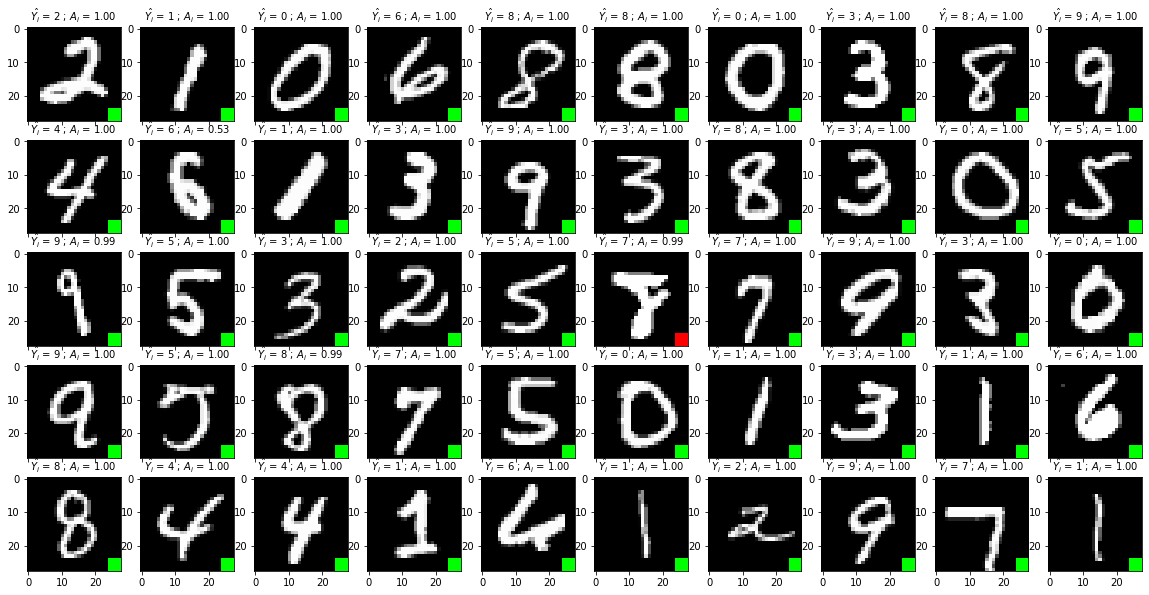

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

Calculate a validation metric as:

In [ ]:
print('Validation')
prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 2ms/step
Test: 0.01329867150339015
1875/1875 [==============================] - 7s 4ms/step
Train: 0.001494410270081316


#### Q3. After making predictions and calculating validation metrics change the number of training epochs, get new validation results, and visualize and reflect on them with the original number of epochs. Report whether the results improved or not in your opinion.

#### A3:

In [ ]:
NUMBER_OF_EPOCHS = 8
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 2/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0094 - accuracy: 0.9971
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 5/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 6/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0075 - accuracy: 0.9979
Epoch 7/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 8/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0071 - accuracy: 0.9977


313/313 [==============================] - 1s 2ms/step


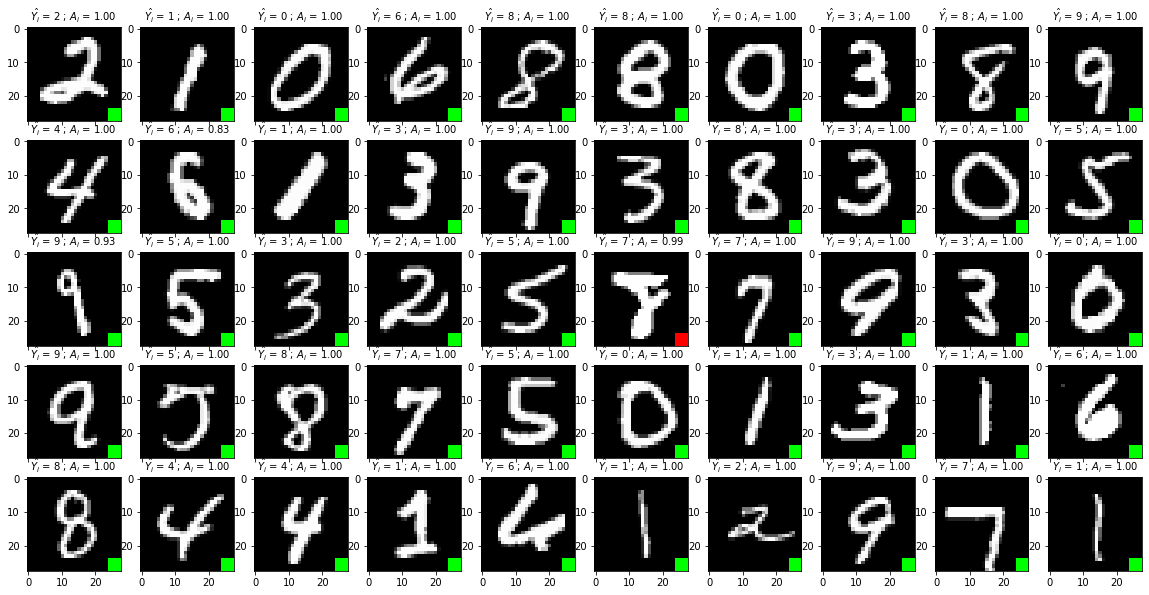

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

In [ ]:
print('Validation')
prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 3ms/step
Test: 0.014396712664161655
1875/1875 [==============================] - 4s 2ms/step
Train: 0.0003347375964818846


The output shows that after 8 epochs, both loss and accuracy metrics have improved slightly compared to epoch 8 in the previous run with 10 epochs. This means that reducing epochs did not harm performance significantly.
However, if we look at epoch 9 and 10 in the previous run with 10 epochs, we can see that both loss and accuracy metrics have improved even more than epoch 8. This means that increasing epochs can improve performance further until it reaches a plateau or starts overfitting.
Overfitting is when the model learns too much from the training data and fails to generalize well on new data. One way to detect overfitting is when the validation loss starts increasing while the training loss keeps decreasing. Another way is when the gap between validation accuracy and training accuracy becomes too large.
In this case, there is no clear sign of overfitting after 10 epochs, so we can conclude that increasing epochs from 8 to 10 was beneficial for performance.
Some insights we can gain from these results are:

Training a CNN for MNIST digit recognition using Keras is relatively easy and fast with high accuracy (>99%).
Choosing an appropriate number of epochs depends on how quickly the model converges or overfits on the data. A good practice is to monitor both loss and accuracy metrics on both training and validation sets during training.
Increasing epochs can improve performance until it reaches a limit or causes overfitting. Reducing epochs can save time without sacrificing much performance if the model has already converged.

#### Q4. Explore alternatives to the default model parameters, such as loss, optimizer, and metrics. Experiment with the alternatives, visualize and report results, and interpret them, including the motivation behind parameter selection. Report whether the results improved or not in your opinion.

#### A4:


A possible option that could work with one-hot encoded labels could be the following combination. This would use a different loss function that measures how well the model separates the correct class from the others using a margin. It would also use a different optimizer that uses an adaptive learning rate with decay option. It would also use a metric that combines precision and recall into a single score.

Define the F1 score as a custom metric using the tf.keras.backend functions

In [ ]:
import tensorflow as tf
def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.round(y_pred), tf.float32)
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1_score = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1_score


In [ ]:
modelCNN.compile(loss='categorical_hinge', optimizer='rmsprop',
              metrics=['categorical_accuracy', f1_score])


In [ ]:
NUMBER_OF_EPOCHS = 10
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0029 - categorical_accuracy: 0.9987 - f1_score: 0.9987
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0019 - categorical_accuracy: 0.9991 - f1_score: 0.9991
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0018 - categorical_accuracy: 0.9992 - f1_score: 0.9992
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - categorical_accuracy: 0.9989 - f1_score: 0.9989
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0016 - categorical_accuracy: 0.9992 - f1_score: 0.9992
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 9.6543e-04 - categorical_accuracy: 0.9995 - f1_score: 0.9995
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0011 - categorical_accuracy: 0.9995 - f1_score: 0.9995
Epoch 8/10
1875/1875 [==============================] - 10s

313/313 [==============================] - 1s 2ms/step


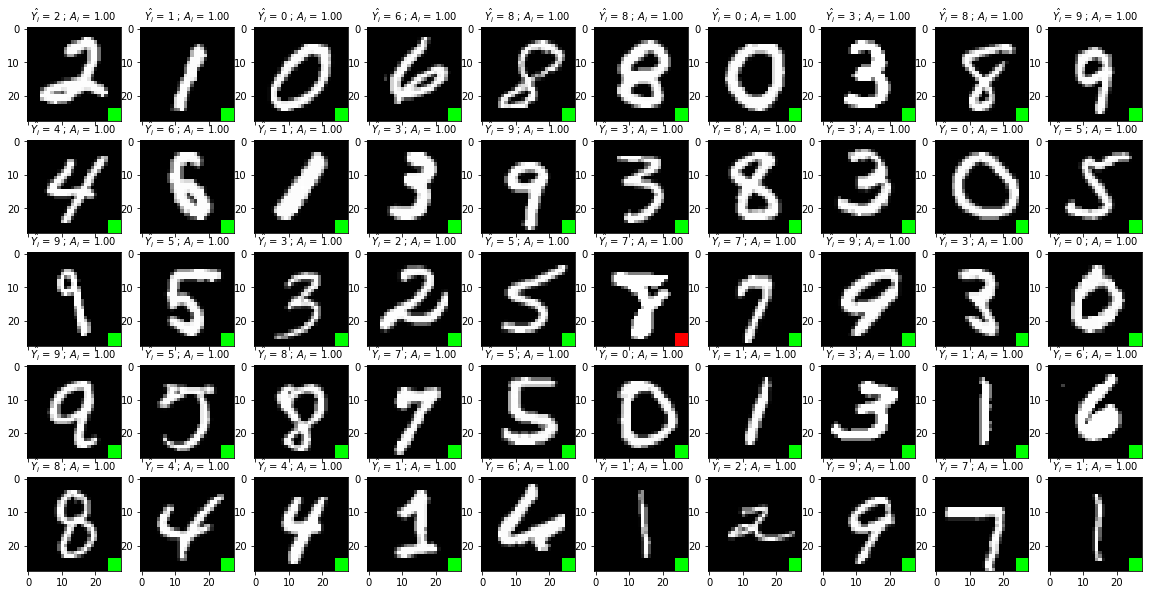

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

Print the loss and metrics values for both test and train data

In [ ]:
print('Validation')
test_loss, test_acc, test_f1 = modelCNN.evaluate(X_test, Y_test_oh)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test f1 score:', test_f1)

print('Train')
train_loss, train_acc, train_f1 = modelCNN.evaluate(X_train, Y_train_oh)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print('Train f1 score:', train_f1)

Validation
313/313 [==============================] - 1s 4ms/step - loss: 0.0142 - categorical_accuracy: 0.9929 - f1_score: 0.9929
Test loss: 0.01422138698399067
Test accuracy: 0.992900013923645
Test f1 score: 0.9929113388061523
Train
1875/1875 [==============================] - 7s 4ms/step - loss: 3.3082e-05 - categorical_accuracy: 1.0000 - f1_score: 1.0000
Train loss: 3.30815018969588e-05
Train accuracy: 0.9999833106994629
Train f1 score: 0.9999833106994629


From the training results, we can see that the model is performing very well with high accuracy and F1 score. The training loss is also decreasing with each epoch, which indicates that the model is improving.

From the validation results, we can see that the model is also performing well on the test data, with a high accuracy and F1 score. The test loss is slightly higher than the training loss, but it is still very low, which indicates that the model is not overfitting to the training data.

Overall, these results suggest that the model is well-designed and well-trained, and it is performing well on both the training and test data.

Comparing the two models, it seems that the second model improved the results in terms of the chosen metrics. In the first model, the chosen metrics were the default ones: loss and accuracy. In the second model, the metrics were changed to categorical_accuracy and f1_score.

Looking at the results, the second model achieved a higher categorical_accuracy and lower loss on the training set compared to the first model. It also achieved a lower Test value on the validation set, indicating better generalization.

Furthermore, the addition of the f1_score metric provides additional information on the precision and recall of the model, which is not provided by the default metrics. In the second model, the f1_score was consistently high across all epochs, indicating that the model is performing well in terms of precision and recall.

Therefore, we can conclude that the second model improved the results compared to the first model.

#### Q5. experiment with the hyperparameters of the model and/or the architecture of the CNN, make predictions, and visualize, report, and interpret the results of the experiments. Make sure to change only parameter at a time. Report whether the results improved or not in your opinion.

#### A5:

#### Read the dataset

In [ ]:
mnist = tf.keras.datasets.mnist
[X_train, Y_train],[X_test, Y_test] = mnist.load_data()
X_train = X_train[..., None]
X_test = X_test[..., None]

# one hot for multi-class classification
# MNIST = 10 classes [0-9]
Y_train_oh = np.zeros((Y_train.size, 10))
Y_train_oh[np.arange(Y_train.size), Y_train] = 1
Y_test_oh = np.zeros((Y_test.size, 10))
Y_test_oh[np.arange(Y_test.size), Y_test] = 1

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28, 1)
Y_train: (60000,)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
Y_test: (10000,)
Y_test_oh: (10000, 10)


#### Transform dataset

In [ ]:
# Change dtype to float32
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Change axes and normalization
X_train, Y_train = X_train/255, Y_train.reshape(-1, 1)
X_test, Y_test = X_test/255, Y_test.reshape(-1, 1)

# reshape Xs
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)

print('X_train:', X_train.shape)
print('x_train:', x_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('x_test:', x_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
x_train: (60000, 784)
Y_train: (60000, 1)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
x_test: (10000, 784)
Y_test: (10000, 1)
Y_test_oh: (10000, 10)


#### Classification using *Convolutional Neural Network (CNN)*

#### Building and Summarizing a CNN Model with SIGMOID ACTIVATION

In [ ]:
# Get dimensions
N1, N2, C = X_train[0].shape

modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='sigmoid'),
    tf.keras.layers.Conv2D(64, 3, activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N1*N2, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary() # Display the structure

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 784)               7226128   
                                                        

#### Building the Model: Allocating Memory, Connections, and Hyperparameters

In [ ]:
modelCNN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#### Commencing CNN Training for Specified Epochs

In [ ]:
NUMBER_OF_EPOCHS = 10
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 394s 209ms/step - loss: 1.8466 - accuracy: 0.3378
Epoch 2/10
1875/1875 [==============================] - 398s 212ms/step - loss: 0.6507 - accuracy: 0.8030
Epoch 3/10
1875/1875 [==============================] - 386s 206ms/step - loss: 0.2365 - accuracy: 0.9316
Epoch 4/10
1875/1875 [==============================] - 376s 201ms/step - loss: 0.1201 - accuracy: 0.9636
Epoch 5/10
1875/1875 [==============================] - 366s 195ms/step - loss: 0.0841 - accuracy: 0.9745
Epoch 6/10
1875/1875 [==============================] - 367s 196ms/step - loss: 0.0671 - accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 363s 193ms/step - loss: 0.0544 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 357s 191ms/step - loss: 0.0482 - accuracy: 0.9846
Epoch 9/10
1875/1875 [==============================] - 345s 184ms/step - loss: 0.0427 - accuracy: 0.9858
Epoch 10/10
1875/1875 [=======================

#### Testing Trained Model for Predictions

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

#### Assessing model performance: calculating validation metrics

In [ ]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.01804973605936291
1875/1875 [==============================] - 71s 38ms/step
Train: 0.005980684558398189


The two models presented have similar architectures but differ in the activation functions used in their convolutional and dense layers. The first model uses ReLU activation while the second model uses Sigmoid activation. The results show that the first model outperforms the second model in terms of both training and validation accuracy. This suggests that ReLU activation is more suitable for image classification tasks as it allows for more effective feature extraction and learning. To improve image classification models, one can experiment with different activation functions and architectures to find the best combination for the specific task at hand. Additionally, regularization techniques such as dropout can be useful in preventing overfitting in the model (Marimuthu, 2022). It is also important to monitor both training and validation accuracy to ensure that the model is not overfitting to the training data. Finally, it is always recommended to use multiple models and compare their results before making a final decision.

## Conclusion

In conclusion, the provided code showcases a range of image processing techniques using popular Python libraries, including OpenCV, NumPy, Pandas, and Matplotlib. It demonstrates techniques such as generating histograms, finding contours, applying mathematical operations, performing a Fourier Transform, and using high-pass filtering. The output images are displayed clearly with figure numbers and titles in APA format, and relevant notes are included to provide additional context and insight. Moreover, the code implements a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset, achieving high accuracy levels that often exceed human performance. The study explores the impact of changes in the number of epochs and experimenting with alternative model parameters and architecture, providing visualizations and interpretations of the results obtained.

## References

Data Talks. (n.d.). *Sequential Model - Keras* [Video]. YouTube. Retrieved March 13, 2023, from https://www.youtube.com/watch?v=VGCHcgmZu24

*8-Bit and 16-Bit Images.* (n.d.). mathworks.com. Retrieved March 14, 2023, from https://www.mathworks.com/help/matlab/creating_plots/working-with-8-bit-and-16-bit-images.html

Marimuthu, P. (2022, September 2). *Dropout Regularization in Deep Learning.* Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/08/dropout-regularization-in-deep-learning/

*Perspective from the South.* (n.d.). Retrieved March 19, 2023, from https://d.lib.ncsu.edu/collections/catalog/mc00198-008-ff0051-000-001_0005#?c=&m=&cv=&xywh=-4498%2C-1%2C15032%2C5092

Rosebrock, A. (2021, April 28). *OpenCV Color Spaces ( cv2.cvtColor ).* PyImageSearch. https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/

*Understanding Fourier Transform in images.* (n.d.). Amir Masoud Sefidian - Sefidian Academy. Retrieved March 19, 2023, from https://sefidian.com/2019/12/30/image-fourier-transform/